In [29]:
import ae
import tensorflow as tf
import os
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from audioop import rms
from matplotlib.pyplot import ylabel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [64]:
def testset(test_path, model, dmg=False):
    ae_test = ae.autoEncoder()
    data = []
    names = []
    imgHeight = 48
    imgWidth = 48
    imgChannel = 3
    img_shape = (imgHeight, imgWidth, imgChannel)
    ts_db = os.path.join(test_path)
    for img in os.listdir(ts_db):
        image = Image.open(os.path.join(ts_db, img)).convert('RGB')
        image = image.resize((imgHeight,imgWidth))
        image = np.array(image)
        image = image/255.0
        data.append(image)
        if dmg:
            names.append(img)
    test_data = np.array(data)
    gen = model.predict(test_data)
    tensor_test = tf.convert_to_tensor(test_data, dtype=tf.float32)
    ssim_vals = []
    psnr_vals = []
    rmse_vals = []
    mre_vals = []
    for i in range(len(test_data)):
        ssim_val = ae_test.compMetric(tensor_test[i], gen[i], "SSIM")
        psnr_val = ae_test.compMetric(tensor_test[i], gen[i], "PSNR")
        rmse_val = ae_test.compMetric(tensor_test[i], gen[i], "RMSE")
        mre_val = ae_test.compMetric(tensor_test[i], gen[i], "MRE")

        ssim_vals.append(ssim_val)
        psnr_vals.append(psnr_val/255.0)
        rmse_vals.append(rmse_val)
        mre_vals.append(mre_val)

        if dmg:
            print('Image',names[i],'ssim: ',float(ssim_val),' psnr: ', float(psnr_val/255.0), ' rmse: ', float(rmse_val), ' mre: ', mre_val)

    if dmg == False:
        print("#Instances: ", len(ssim_vals))
    return ssim_vals, psnr_vals, rmse_vals, mre_vals

def visualize(ssim_vals, psnr_vals, rmse_vals, mre_vals, sign):
    std_ssim = np.std(ssim_vals)
    mean_ssim = np.mean(ssim_vals)

    std_psnr = np.std(psnr_vals)
    mean_psnr = np.mean(psnr_vals)

    std_rmse = np.std(rmse_vals)
    mean_rmse = np.mean(rmse_vals)

    std_mre = np.std(mre_vals)
    mean_mre = np.mean(mre_vals)


    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Image Comparison Metrics Distributions of Sign '+sign)


    ax = sns.distplot(ssim_vals, hist=True, kde=True, ax=axes[0,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'SSIM Distance', ylabel = "#Instances")

    print("ssim mean: ", mean_ssim, " ssim \u03C3: ", std_ssim, " ssim \u03BC+\u03C3: ", std_ssim+mean_ssim)
    print("ssim \u03BC+1.5\u03C3: ", (1.5)*std_ssim+mean_ssim, " ssim \u03BC+2\u03C3: ", (2.0)*std_ssim+mean_ssim)
    ax.axvline(mean_ssim, color='red', linewidth=2)
    ax.axvline(std_ssim+mean_ssim, color='green', linewidth=2)
    ax.axvline((1.5)*std_ssim+mean_ssim, color='yellow', linewidth=2)
    ax.axvline((2.0)*std_ssim+mean_ssim, color='purple', linewidth=2)


    ax = sns.distplot(psnr_vals, hist=True, kde=True, ax=axes[0,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'PSNR Distance', ylabel = "#Instances")
    print("psnr mean: ", mean_psnr, " psnr \u03C3: ", std_psnr, " psnr \u03BC+\u03C3: ", std_psnr+mean_psnr)
    print("psnr \u03BC+1.5\u03C3: ", (1.5)*std_psnr+mean_psnr, " psnr \u03BC+2\u03C3: ", (2.0)*std_psnr+mean_psnr)
    ax.axvline(mean_psnr, color='red', linewidth=2)
    ax.axvline(std_psnr+mean_psnr, color='green', linewidth=2)
    ax.axvline((1.5)*std_psnr+mean_psnr, color='yellow', linewidth=2)
    ax.axvline((2.0)*std_psnr+mean_psnr, color='purple', linewidth=2)

    ax = sns.distplot(rmse_vals, hist=True, kde=True, ax=axes[1,0],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'RMSE Distance', ylabel = "#Instances")
    print("rmse mean: ", mean_rmse, " rmse \u03C3: ", std_rmse, " rmse \u03BC+\u03C3: ", std_rmse+mean_rmse)
    print("rmse \u03BC+1.5\u03C3: ", (1.5)*std_rmse+mean_rmse, " rmse \u03BC+2\u03C3: ", (2.0)*std_rmse+mean_rmse)
    ax.axvline(mean_rmse, color='red', linewidth=2)
    ax.axvline(std_rmse+mean_rmse, color='green', linewidth=2)
    ax.axvline((1.5)*std_rmse+mean_rmse, color='yellow', linewidth=2)
    ax.axvline((2.0)*std_rmse+mean_rmse, color='purple', linewidth=2)

    ax = sns.distplot(mre_vals, hist=True, kde=True, ax=axes[1,1],
                color = 'darkblue',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4, 'color': 'orange'})

    ax.set(xlabel = 'MRE Distance', ylabel = "#Instances")
    print("mre mean: ", mean_mre, " mre \u03C3: ", std_mre, " mre \u03BC+\u03C3: ", std_mre+mean_mre)
    print("mre \u03BC+1.5\u03C3: ", (1.5)*std_mre+mean_mre, " mre \u03BC+2\u03C3: ", (2.0)*std_mre+mean_mre)
    ax.axvline(mean_mre, color='red', linewidth=2)
    ax.axvline(std_mre+mean_mre, color='green', linewidth=2)
    ax.axvline((1.5)*std_mre+mean_mre, color='yellow', linewidth=2)
    ax.axvline((2.0)*std_mre+mean_mre, color='purple', linewidth=2)



In [65]:
weight_file_cropped_all = "/home/can/thesis/ae_weights/cropped_allfullmodel1mse.h5"
ae_cropped_all = ae.autoEncoder()
model_cropped_all= ae_cropped_all.loadModel(weight_file_cropped_all)

test_path1 = "/home/can/thesis/gtsrb/damaged_signs/1/healthy/"
test_path9 = "/home/can/thesis/gtsrb/damaged_signs/9/healthy/"
test_path14 = "/home/can/thesis/gtsrb/damaged_signs/14/healthy/"
test_path17 = "/home/can/thesis/gtsrb/damaged_signs/17/healthy/"
test_path25 = "/home/can/thesis/gtsrb/damaged_signs/25/healthy/"
test_path39 = "/home/can/thesis/gtsrb/damaged_signs/39/healthy/"

test_path1_dmg = "/home/can/thesis/gtsrb/damaged_signs/1/dmg/"
test_path9_dmg = "/home/can/thesis/gtsrb/damaged_signs/9/dmg/"
test_path14_dmg = "/home/can/thesis/gtsrb/damaged_signs/14/dmg/"
test_path17_dmg = "/home/can/thesis/gtsrb/damaged_signs/17/dmg/"
test_path25_dmg = "/home/can/thesis/gtsrb/damaged_signs/25/dmg/"
test_path39_dmg = "/home/can/thesis/gtsrb/damaged_signs/39/dmg/"

Destructor called, Employee deleted.


23/23 [==============================] - 0s 3ms/step
#Instances:  720
Destructor called, Employee deleted.
ssim mean:  0.11927184901303715  ssim σ:  0.06287649008266877  ssim μ+σ:  0.18214833909570594
ssim μ+1.5σ:  0.2135865841370403  ssim μ+2σ:  0.2450248291783747
psnr mean:  0.28767186391327637  psnr σ:  0.015254446485997636  psnr μ+σ:  0.302926310399274
psnr μ+1.5σ:  0.31055353364227284  psnr μ+2σ:  0.31818075688527164
rmse mean:  0.059926108  rmse σ:  0.023495395  rmse μ+σ:  0.0834215
rmse μ+1.5σ:  0.0951691996306181  rmse μ+2σ:  0.1069168969988823
mre mean:  0.12760964  mre σ:  0.03818554  mre μ+σ:  0.16579518
mre μ+1.5σ:  0.1848879512399435  mre μ+2σ:  0.2039807215332985
1/1 [==============================] - 0s 15ms/step
Image 5.png ssim:  0.5771467387676239  psnr:  0.24524943033854166  rmse:  0.1903749257326126  mre:  1.0237849
Image 0.png ssim:  0.5012859404087067  psnr:  0.23785530539119945  rmse:  0.23652926087379456  mre:  1.1281636
Image 4.png ssim:  0.2586226463317871  ps

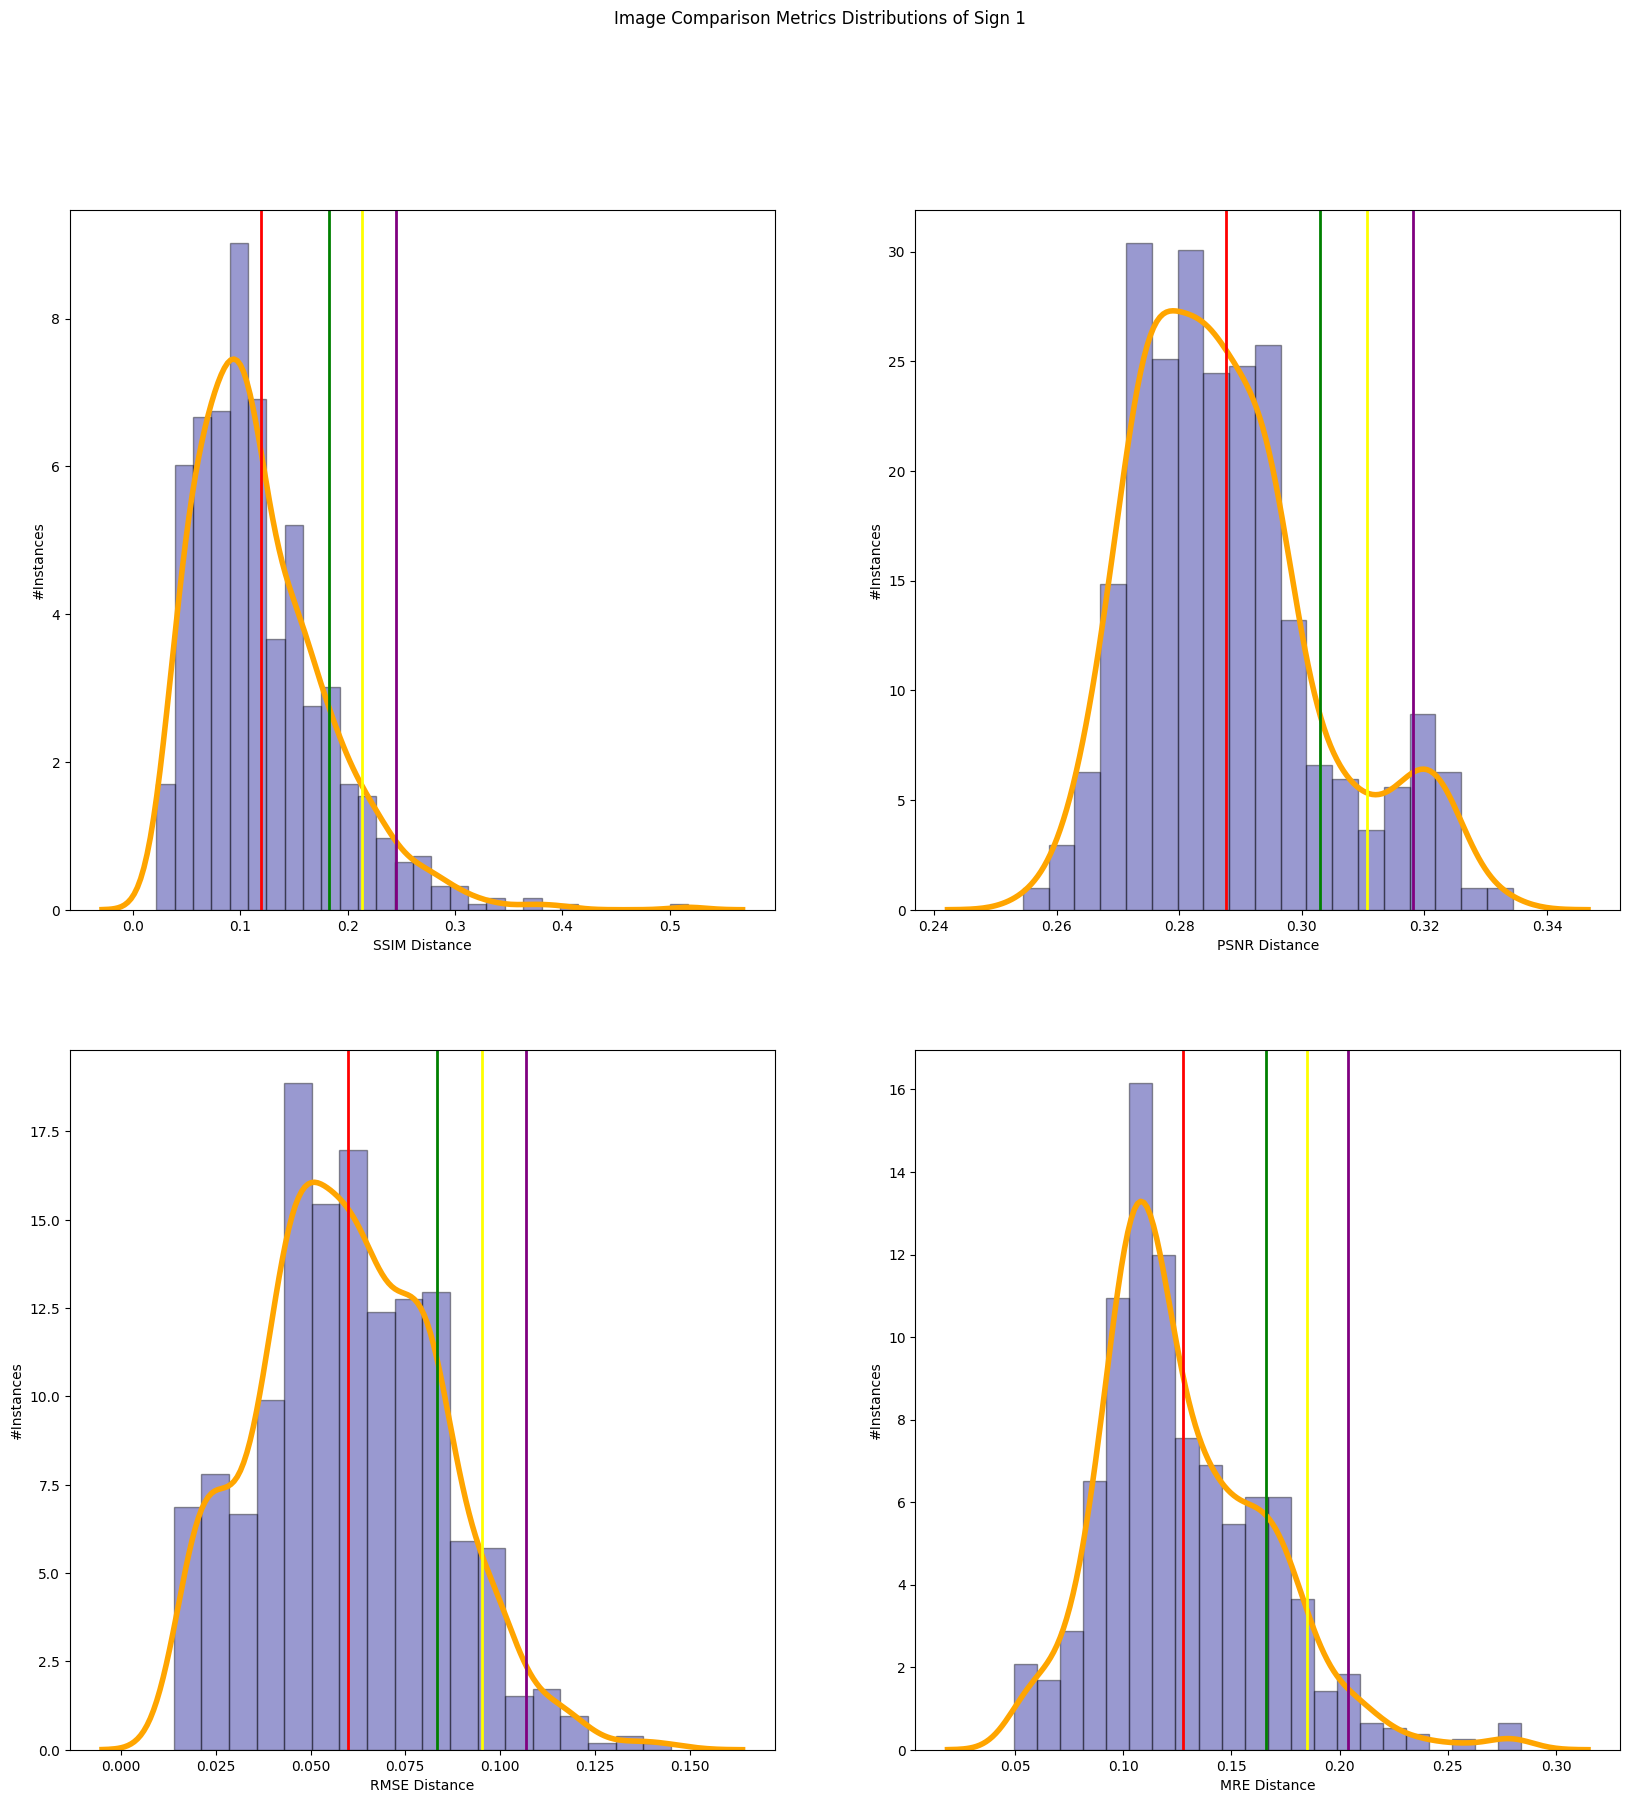

In [66]:
ssim1, psnr1, rmse1, mre1 = testset(test_path1, model_cropped_all)
visualize(ssim1, psnr1, rmse1, mre1, "1")
_,_,_,_ = testset(test_path1_dmg, model_cropped_all,True)


15/15 [==============================] - 0s 3ms/step
#Instances:  480
Destructor called, Employee deleted.
ssim mean:  0.11968402291337649  ssim σ:  0.07379357619008053  ssim μ+σ:  0.19347759910345702
ssim μ+1.5σ:  0.2303743871984973  ssim μ+2σ:  0.26727117529353756
psnr mean:  0.30187651235293717  psnr σ:  0.01948760731320914  psnr μ+σ:  0.3213641196661463
psnr μ+1.5σ:  0.33110792332275085  psnr μ+2σ:  0.34085172697935545
rmse mean:  0.042066257  rmse σ:  0.023607705  rmse μ+σ:  0.06567396
rmse μ+1.5σ:  0.07747781462967396  rmse μ+2σ:  0.08928166702389717
mre mean:  0.14482372  mre σ:  0.084976755  mre μ+σ:  0.22980046
mre μ+1.5σ:  0.27228884771466255  mre μ+2σ:  0.3147772252559662
1/1 [==============================] - 0s 15ms/step
Image 0.png ssim:  0.4873034954071045  psnr:  0.25531735887714463  rmse:  0.14165879786014557  mre:  0.30653304
Image 1.png ssim:  0.6276756823062897  psnr:  0.25450906192555145  rmse:  0.14506062865257263  mre:  0.48034883
Image 2.png ssim:  0.54716134071

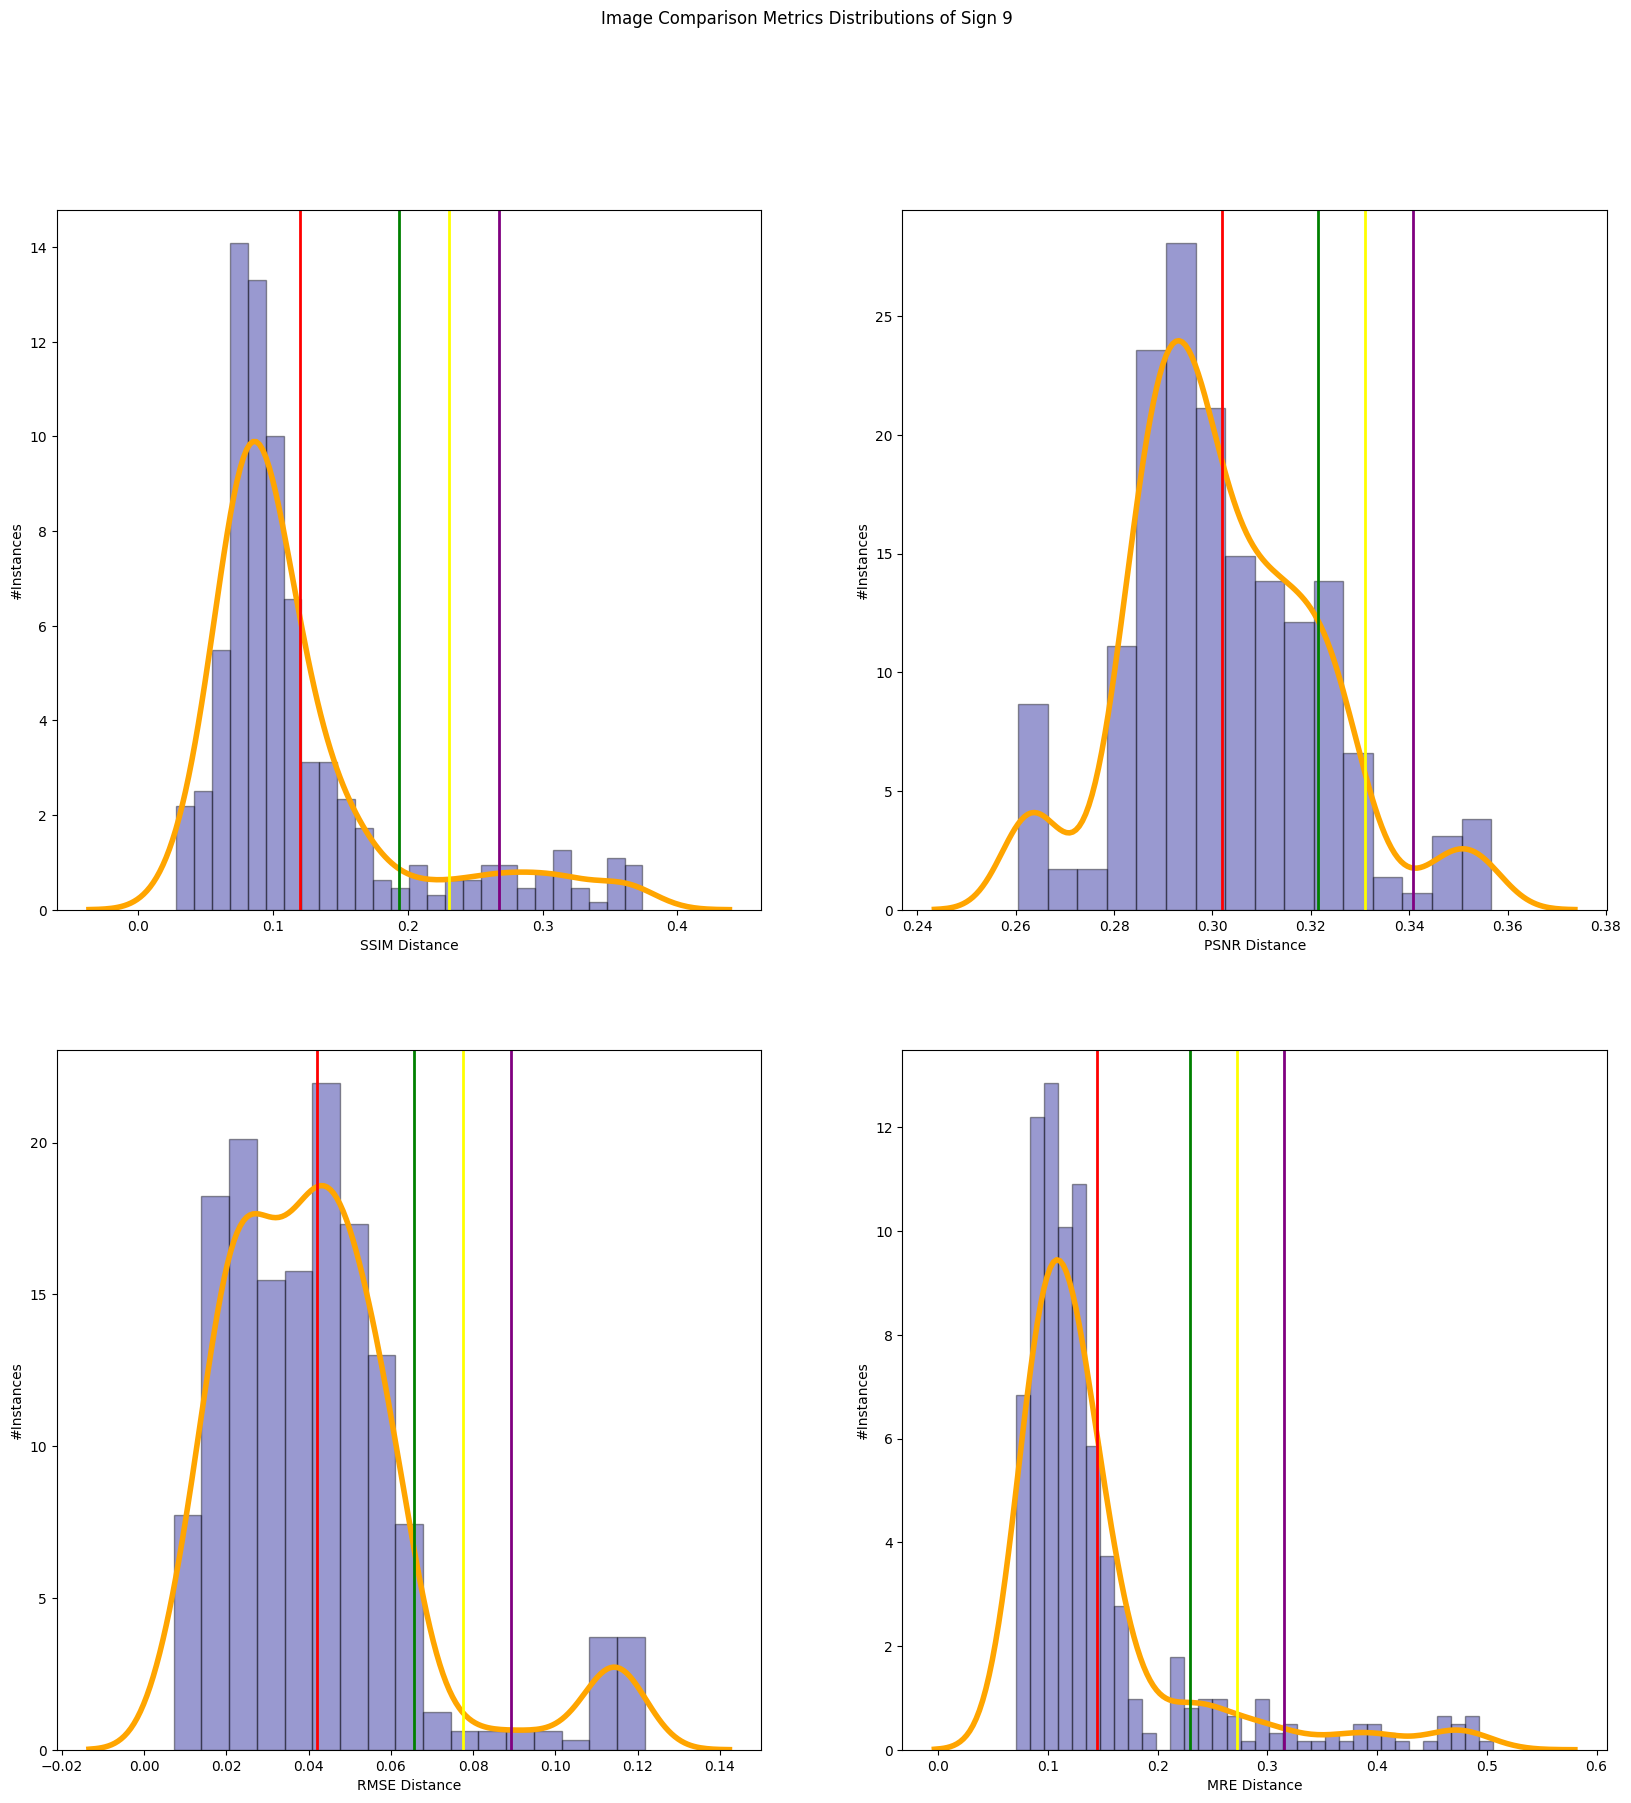

In [67]:
ssim9, psnr9, rmse9, mre9 = testset(test_path9, model_cropped_all)
visualize(ssim9, psnr9, rmse9, mre9,"9")
_,_,_,_ = testset(test_path9_dmg, model_cropped_all,True)

9/9 [==============================] - 0s 3ms/step
#Instances:  270
Destructor called, Employee deleted.
ssim mean:  0.18265231163413437  ssim σ:  0.09465374209728454  ssim μ+σ:  0.2773060537314189
ssim μ+1.5σ:  0.32463292478006117  ssim μ+2σ:  0.3719597958287034
psnr mean:  0.28473914684553286  psnr σ:  0.015476574010165722  psnr μ+σ:  0.3002157208556986
psnr μ+1.5σ:  0.3079540078607814  psnr μ+2σ:  0.3156922948658643
rmse mean:  0.064877406  rmse σ:  0.022056278  rmse μ+σ:  0.08693369
rmse μ+1.5σ:  0.09796182252466679  rmse μ+2σ:  0.10898996144533157
mre mean:  0.18149006  mre σ:  0.06843213  mre μ+σ:  0.24992219
mre μ+1.5σ:  0.2841382585465908  mre μ+2σ:  0.3183543235063553
1/1 [==============================] - 0s 14ms/step
Image 11.png ssim:  0.4916558861732483  psnr:  0.265247330011106  rmse:  0.10583679378032684  mre:  0.17772624
Image 5.png ssim:  0.33677762746810913  psnr:  0.25223215140548405  rmse:  0.15508873760700226  mre:  0.49165648
Image 7.png ssim:  0.39451050758361816

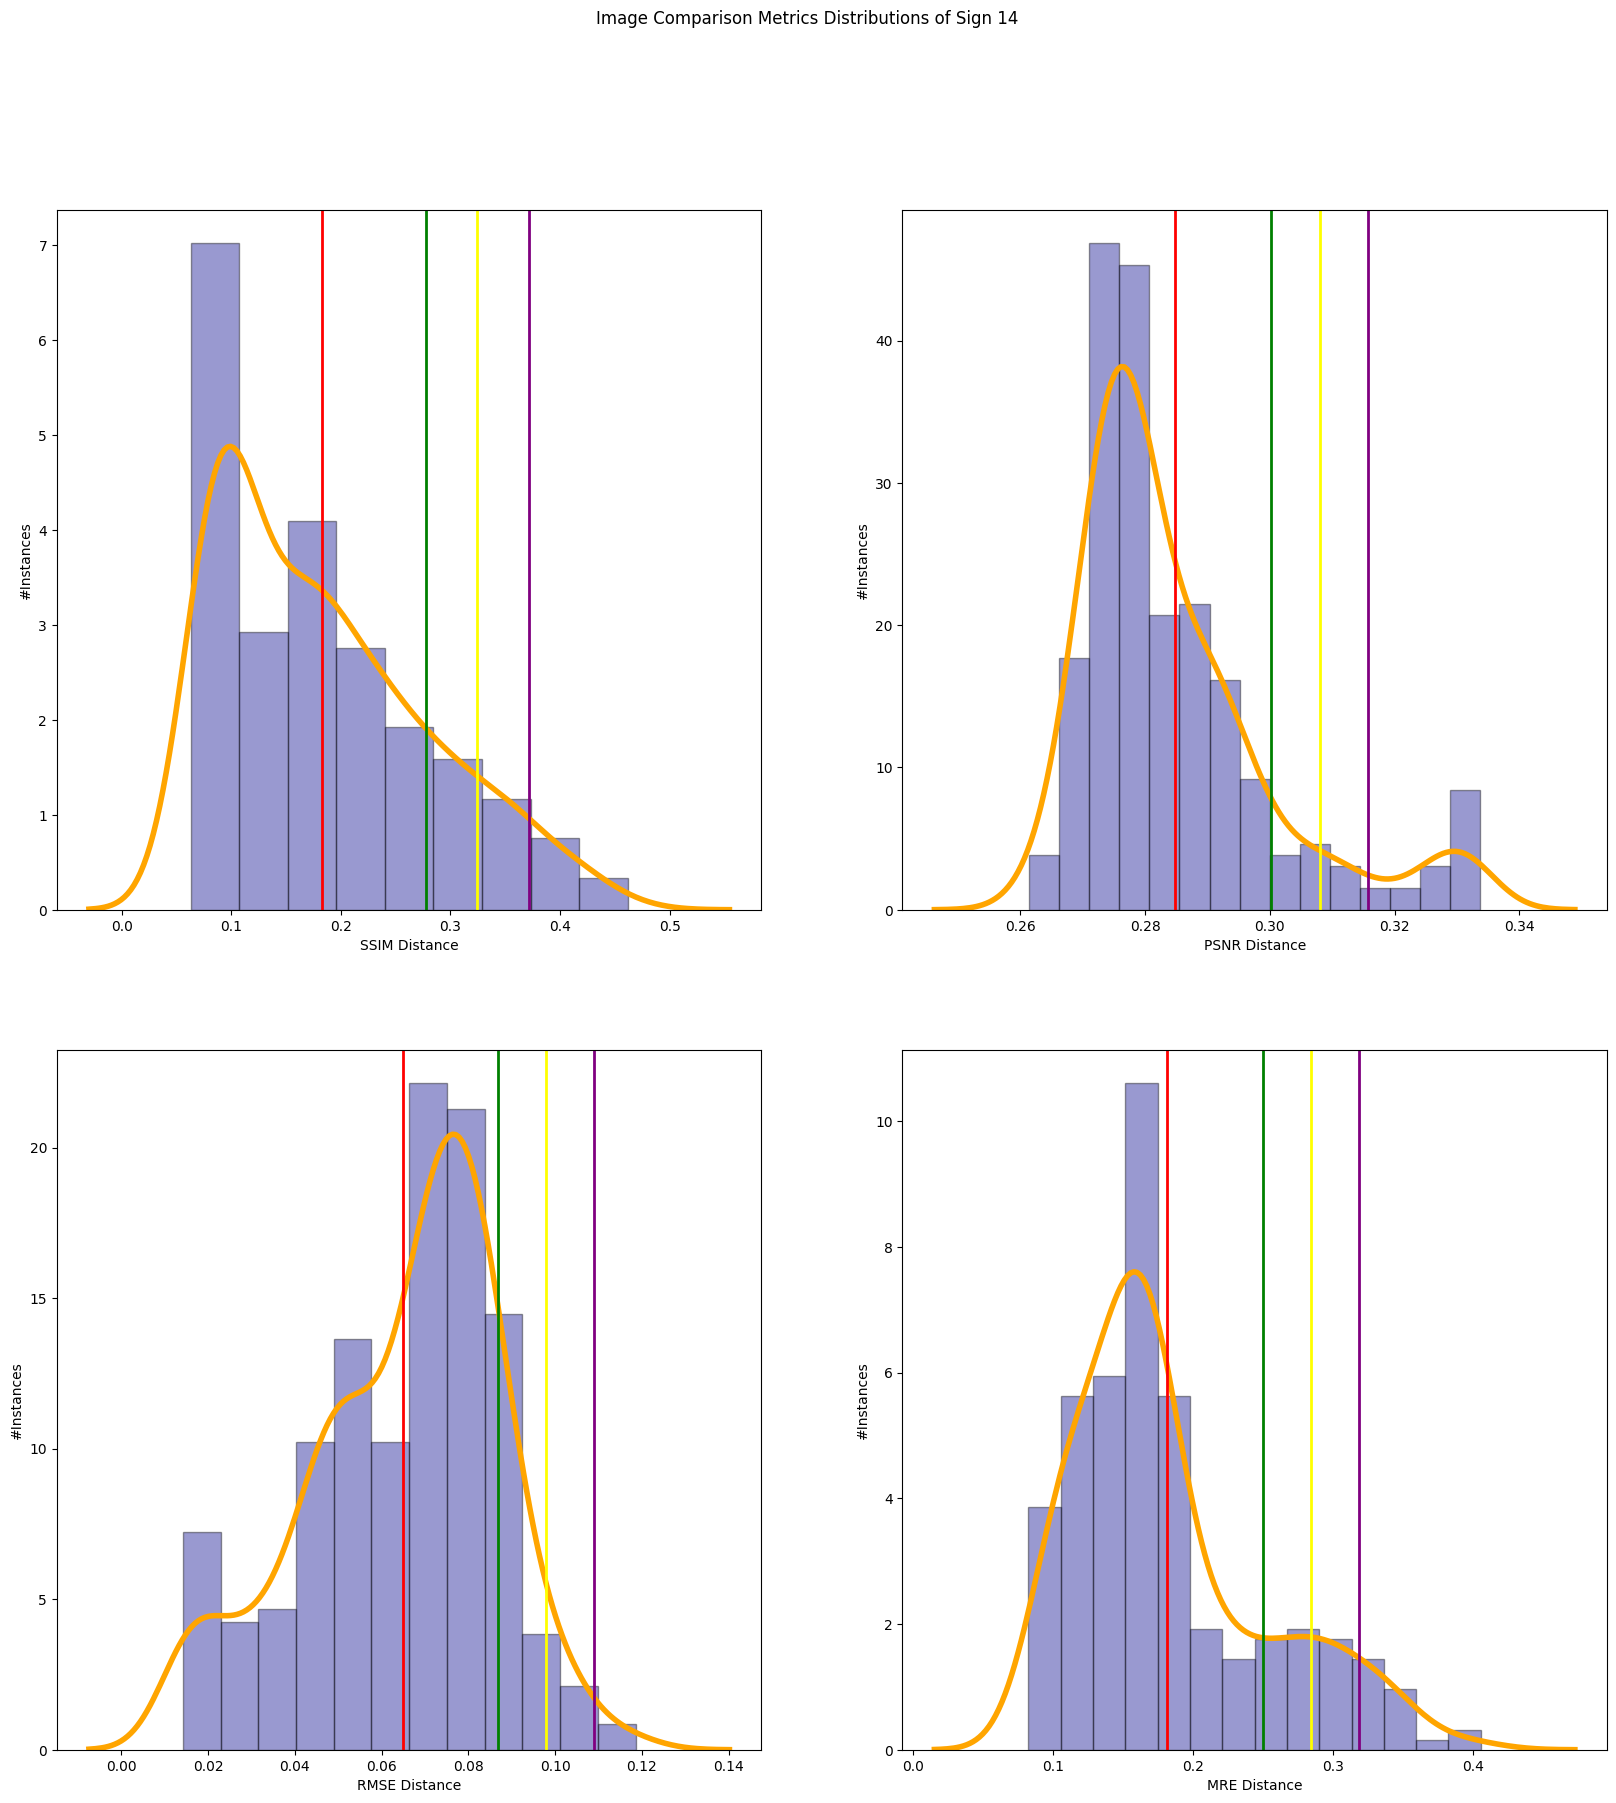

In [68]:
ssim14, psnr14, rmse14, mre14 = testset(test_path14, model_cropped_all)
visualize(ssim14, psnr14, rmse14, mre14,"14")
_,_,_,_ = testset(test_path14_dmg, model_cropped_all,True)

12/12 [==============================] - 0s 3ms/step
#Instances:  360
Destructor called, Employee deleted.
ssim mean:  0.17619811511702008  ssim σ:  0.07323149132430341  ssim μ+σ:  0.2494296064413235
ssim μ+1.5σ:  0.2860453521034752  ssim μ+2σ:  0.3226610977656269
psnr mean:  0.28674257748007514  psnr σ:  0.01684868884843946  psnr μ+σ:  0.30359126632851463
psnr μ+1.5σ:  0.3120156107527343  psnr μ+2σ:  0.32043995517695406
rmse mean:  0.06306695  rmse σ:  0.028298471  rmse μ+σ:  0.09136543
rmse μ+1.5σ:  0.1055146586149931  rmse μ+2σ:  0.11966389417648315
mre mean:  0.14787759  mre σ:  0.087903716  mre μ+σ:  0.23578131
mre μ+1.5σ:  0.27973316237330437  mre μ+2σ:  0.32368502020835876
1/1 [==============================] - 0s 14ms/step
Image 5.png ssim:  0.4270027279853821  psnr:  0.26590232101141237  rmse:  0.10382106155157089  mre:  0.2121709
Image 7.png ssim:  0.4899647831916809  psnr:  0.2548022101907169  rmse:  0.14381757378578186  mre:  0.6257188
Image 1.jpg ssim:  0.7274129092693329 

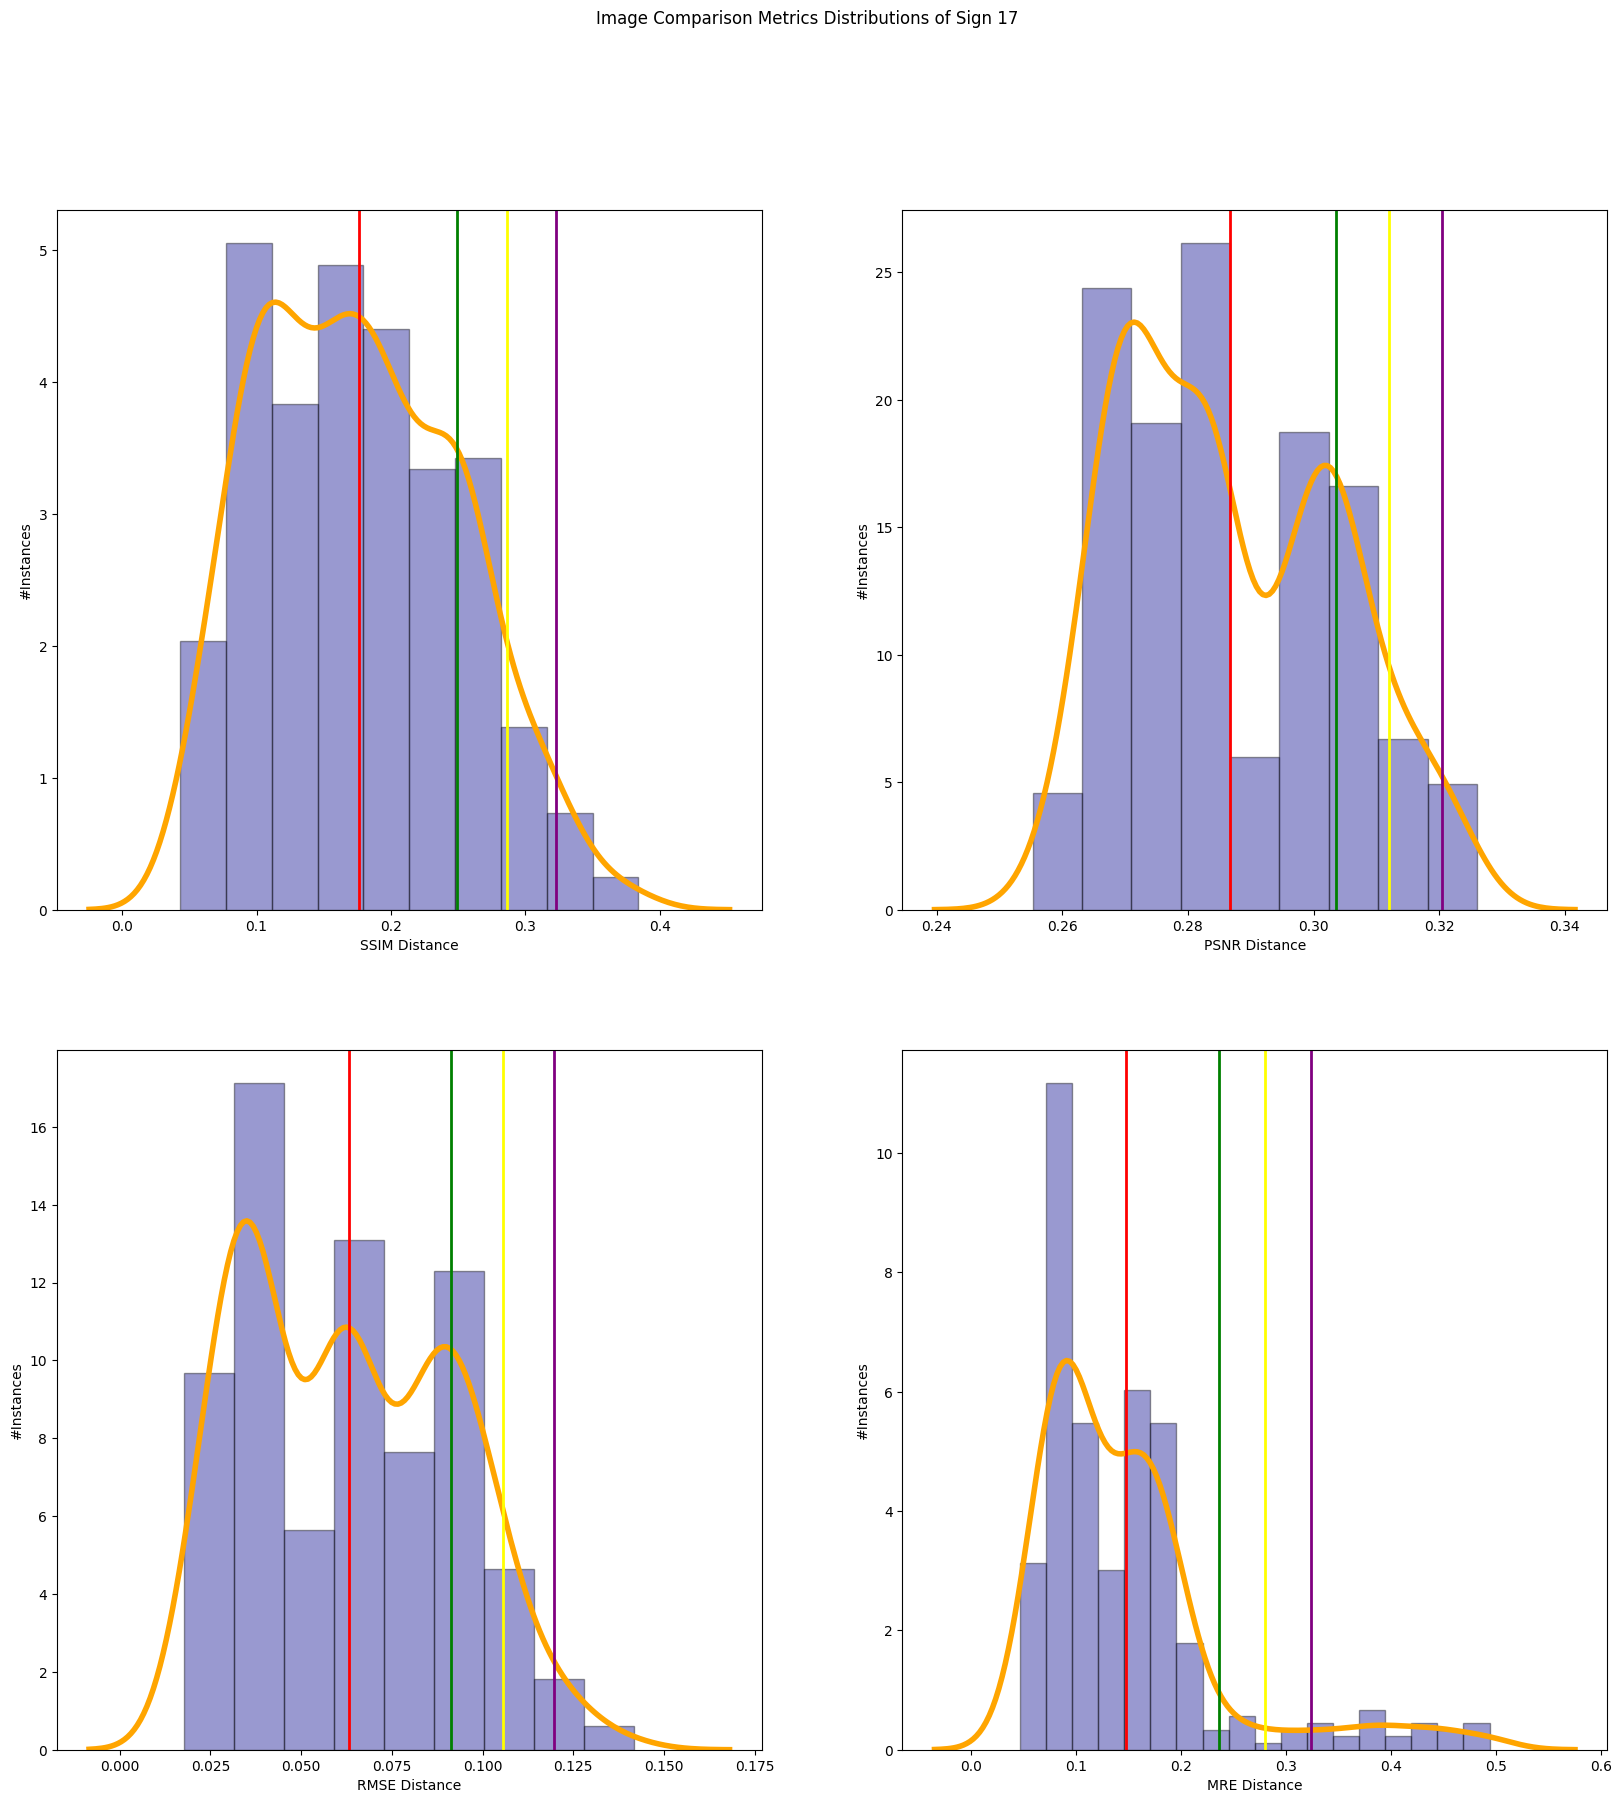

In [69]:
ssim17, psnr17, rmse17, mre17 = testset(test_path17, model_cropped_all)
visualize(ssim17, psnr17, rmse17, mre17,"17")
_,_,_,_ = testset(test_path17_dmg, model_cropped_all,True)

15/15 [==============================] - 0s 3ms/step
#Instances:  480
Destructor called, Employee deleted.
ssim mean:  0.22587882100294035  ssim σ:  0.095378588805107  ssim μ+σ:  0.32125740980804735
ssim μ+1.5σ:  0.36894670421060083  ssim μ+2σ:  0.41663599861315437
psnr mean:  0.27745982219970305  psnr σ:  0.01744329531247162  psnr μ+σ:  0.2949031175121747
psnr μ+1.5σ:  0.30362476516841047  psnr μ+2σ:  0.3123464128246463
rmse mean:  0.08225671  rmse σ:  0.032315284  rmse μ+σ:  0.114571996
rmse μ+1.5σ:  0.13072963804006577  rmse μ+2σ:  0.14688728004693985
mre mean:  0.2120878  mre σ:  0.07244605  mre μ+σ:  0.28453386
mre μ+1.5σ:  0.32075686752796173  mre μ+2σ:  0.3569798916578293
1/1 [==============================] - 0s 16ms/step
Image 5.png ssim:  0.7046643793582916  psnr:  0.23978335810642618  rmse:  0.22351272404193878  mre:  2.3034708
Image 7.png ssim:  0.6747779250144958  psnr:  0.2402218687768076  rmse:  0.2206537127494812  mre:  1.3942437
Image 0.png ssim:  0.5618467032909393  p

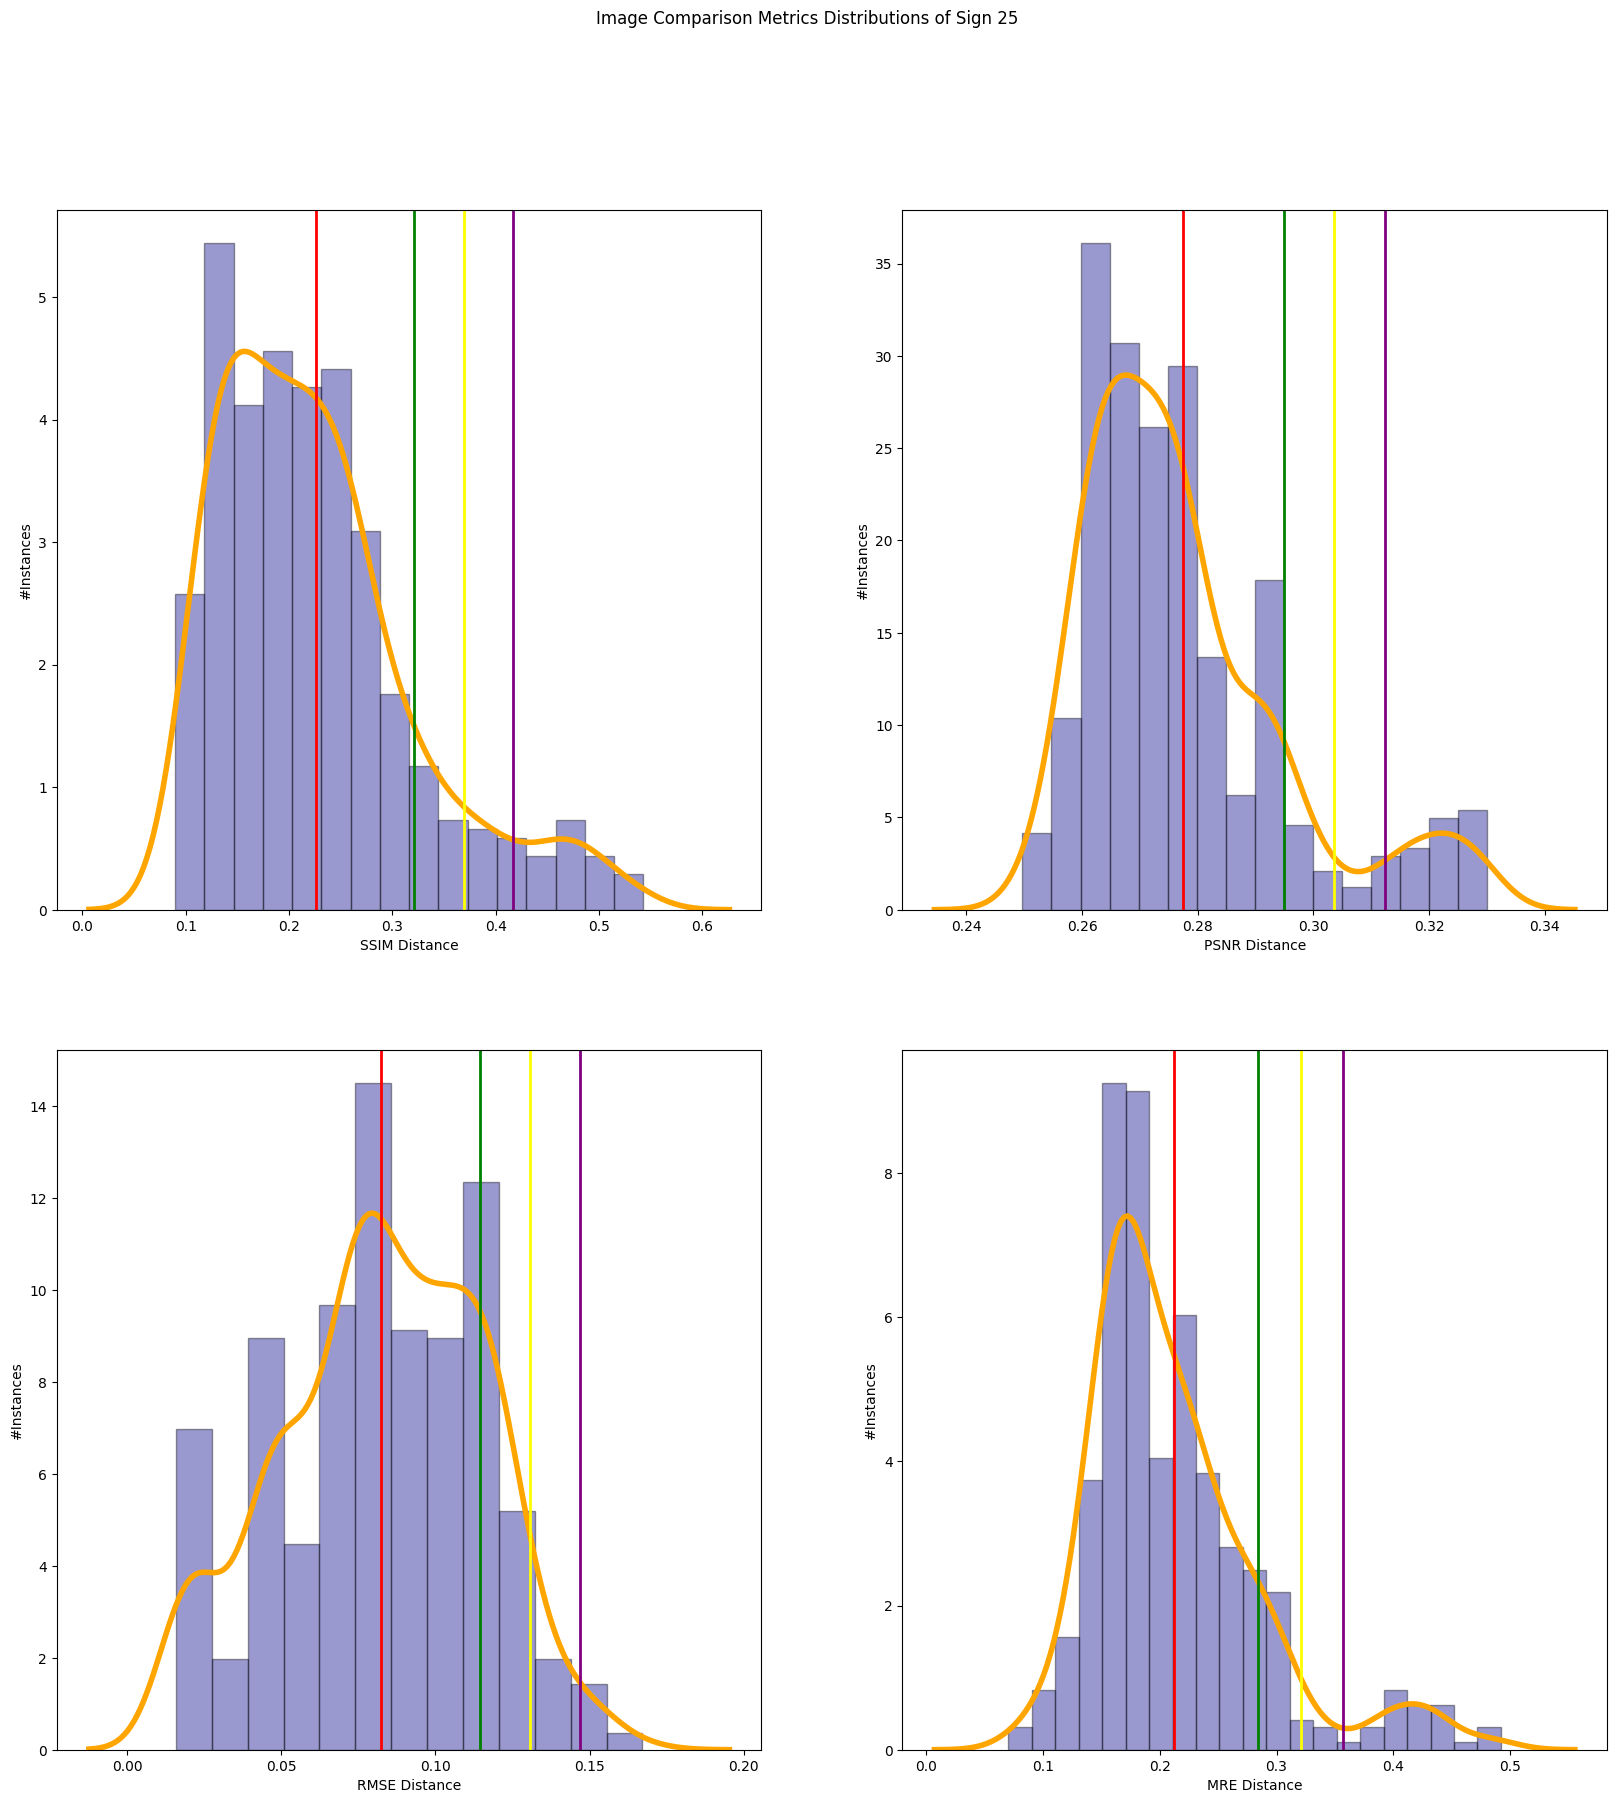

In [70]:
ssim25, psnr25, rmse25, mre25 = testset(test_path25, model_cropped_all)
visualize(ssim25, psnr25, rmse25, mre25,"25")
_,_,_,_ = testset(test_path25_dmg, model_cropped_all,True)

3/3 [==============================] - 0s 3ms/step
#Instances:  90
Destructor called, Employee deleted.
ssim mean:  0.18700248731507196  ssim σ:  0.07441291808925679  ssim μ+σ:  0.2614154054043287
ssim μ+1.5σ:  0.29862186444895716  ssim μ+2σ:  0.33582832349358555
psnr mean:  0.29142962786107285  psnr σ:  0.027569827099129123  psnr μ+σ:  0.318999454960202
psnr μ+1.5σ:  0.33278436850976656  psnr μ+2σ:  0.3465692820593311
rmse mean:  0.06292863  rmse σ:  0.033540502  rmse μ+σ:  0.096469134
rmse μ+1.5σ:  0.11323938518762589  rmse μ+2σ:  0.13000963628292084
mre mean:  0.1513065  mre σ:  0.039348345  mre μ+σ:  0.19065484
mre μ+1.5σ:  0.21032901294529438  mre μ+2σ:  0.23000318557024002
1/1 [==============================] - 0s 16ms/step
Image 0.png ssim:  0.5635547935962677  psnr:  0.25611270081763177  rmse:  0.138389453291893  mre:  0.23059486
Image 3.png ssim:  0.6361558139324188  psnr:  0.24410873113893994  rmse:  0.19685831665992737  mre:  1.5228509
Image 1.png ssim:  0.6286789178848267  

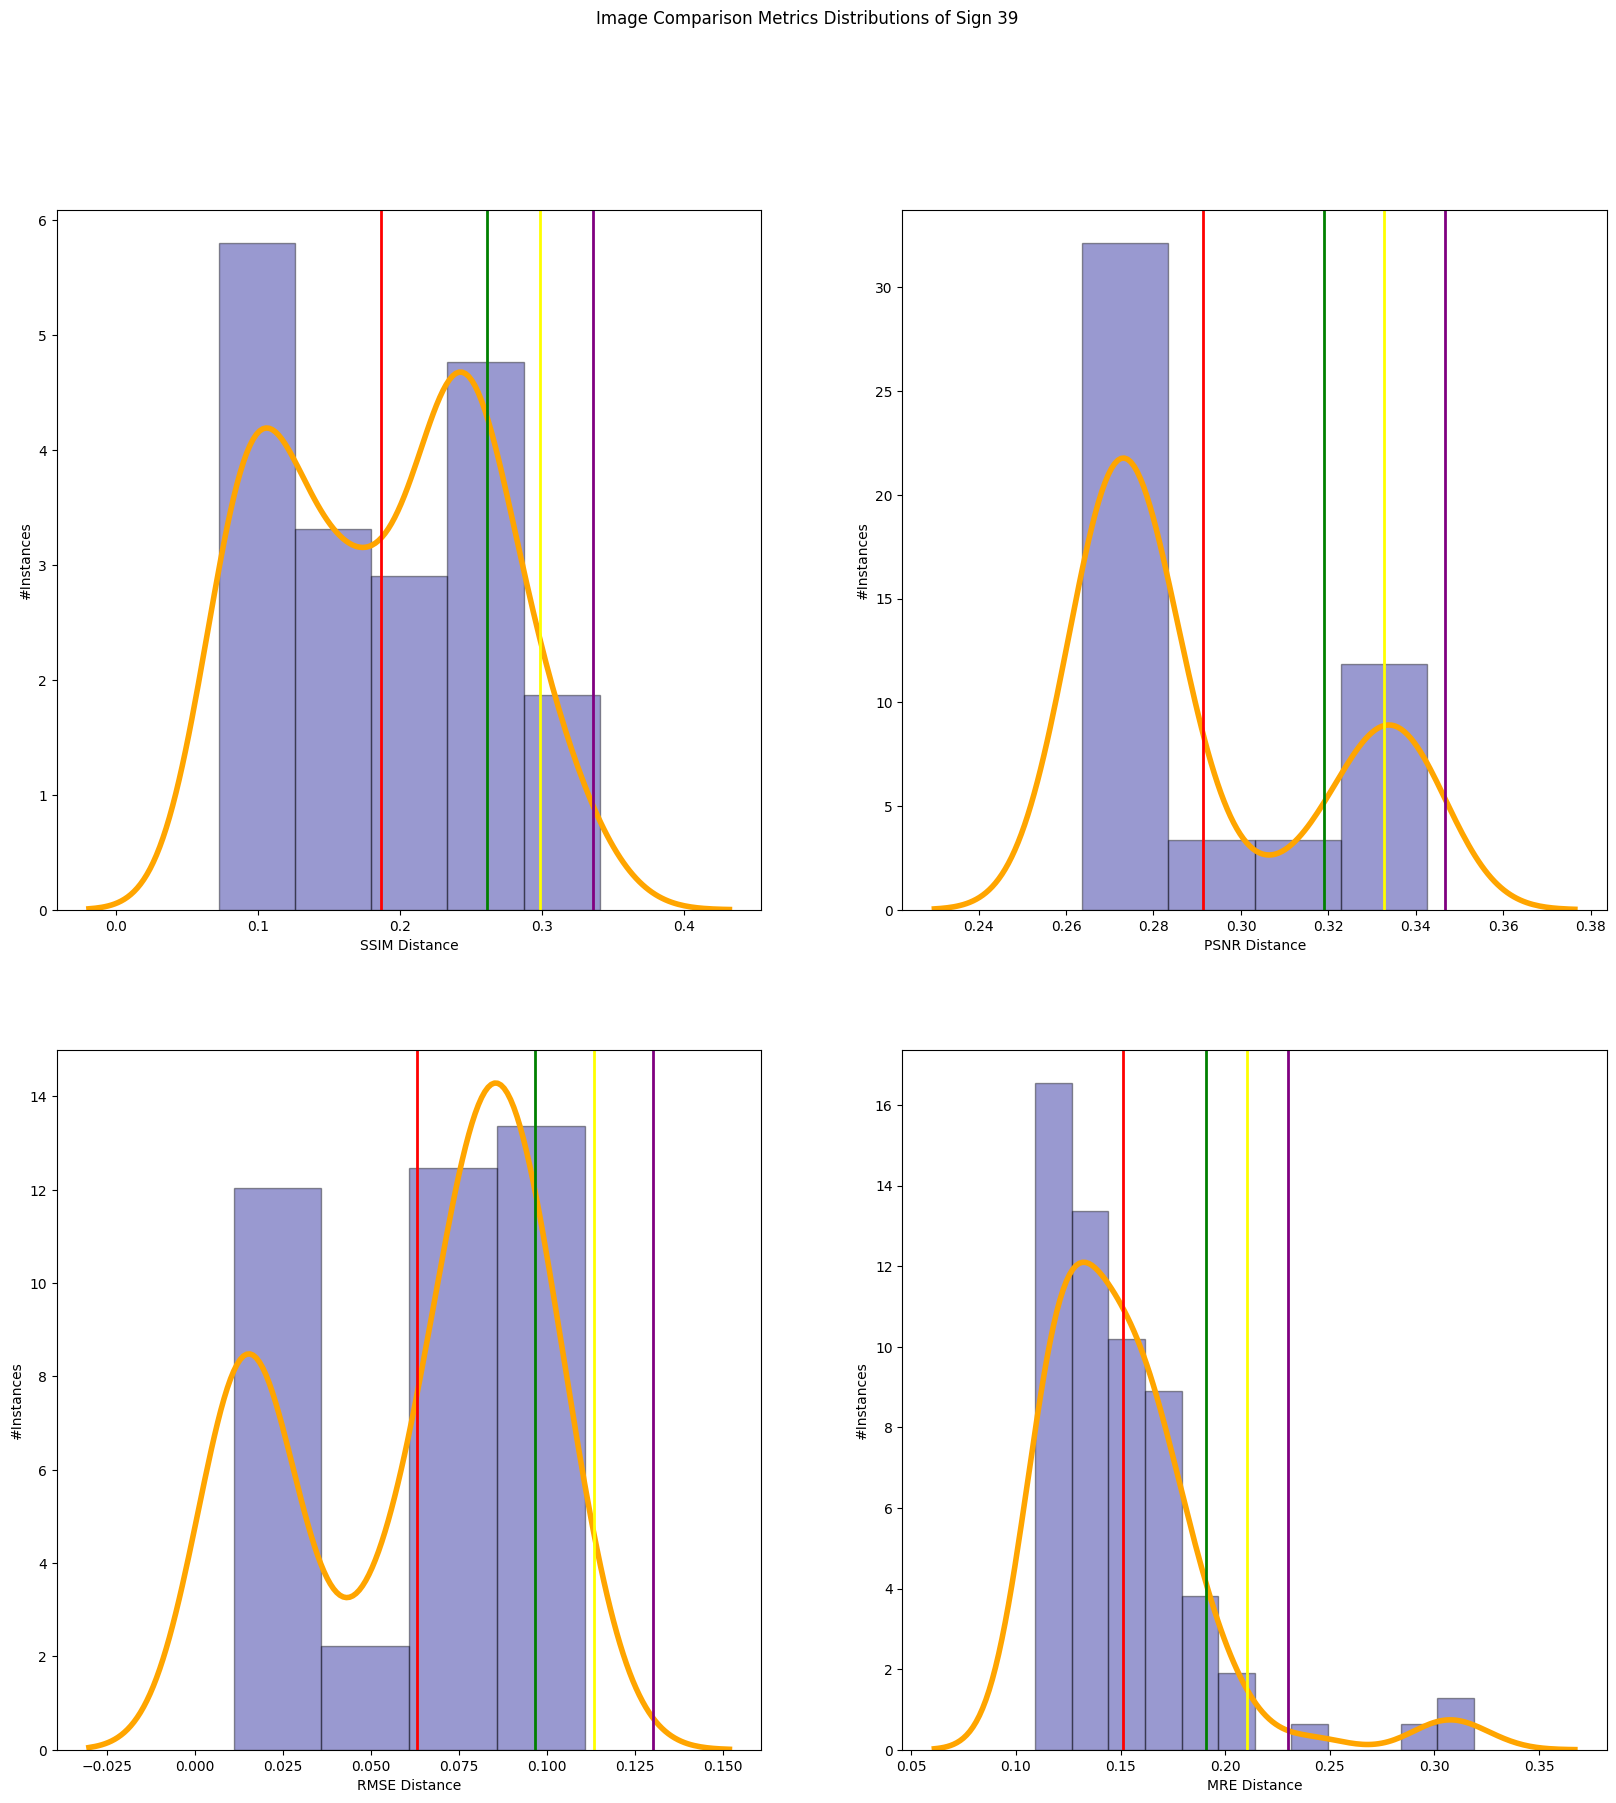

In [71]:
ssim39, psnr39, rmse39, mre39 = testset(test_path39, model_cropped_all)
visualize(ssim39, psnr39, rmse39, mre39,"39")
_,_,_,_ = testset(test_path39_dmg, model_cropped_all,True)